In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv("/content/stocks.csv")
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.503794905884914


In [ ]:
y_train_binary = (y_train.diff() > 0).astype(int)
y_test_binary = (y_test.diff() > 0).astype(int)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train_binary)

y_pred_binary = classifier.predict(X_test)

report = classification_report(y_test_binary, y_pred_binary)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        25
           1       0.77      0.68      0.72        25

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
text = "AAPL reported better-than-expected earnings, driving the stock price up."

sentiment = sia.polarity_scores(text)
print("Sentiment Scores:", sentiment)

Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


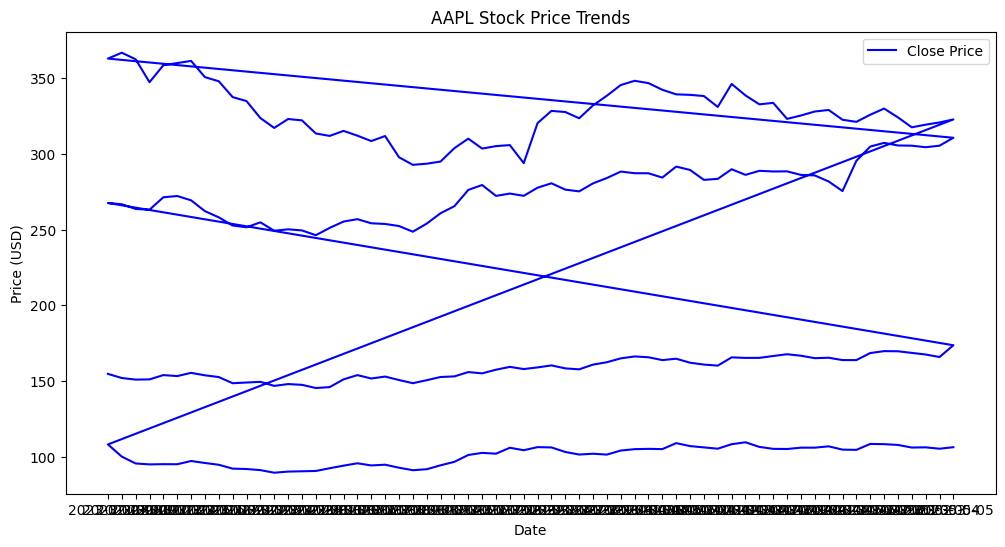

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('AAPL Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

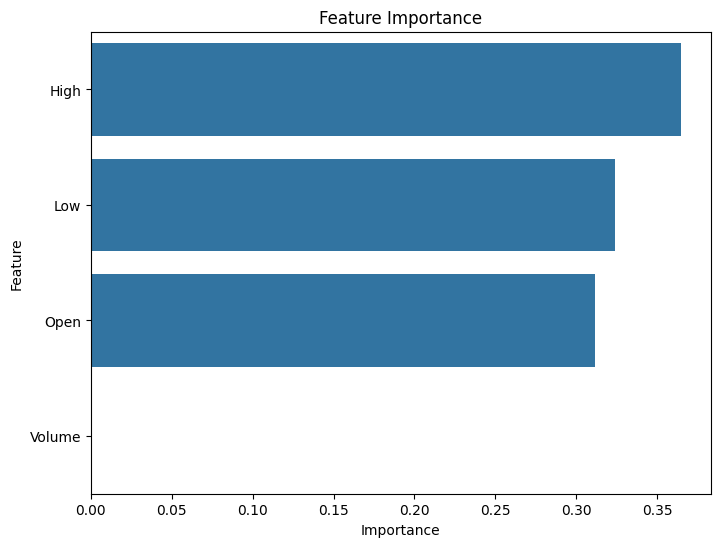

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

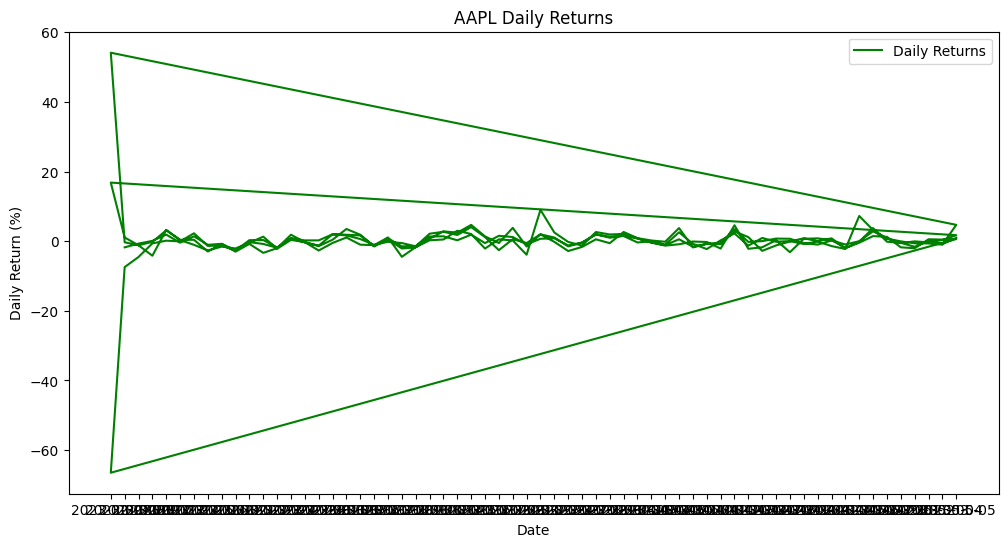

In [ ]:
data['Daily Return'] = data['Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily Return'], label='Daily Returns', color='green')
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()

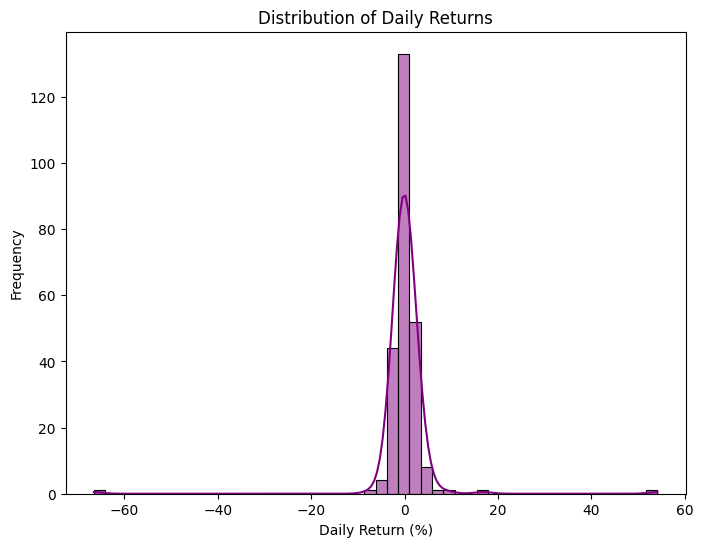

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Daily Return'].dropna(), bins=50, color='purple', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

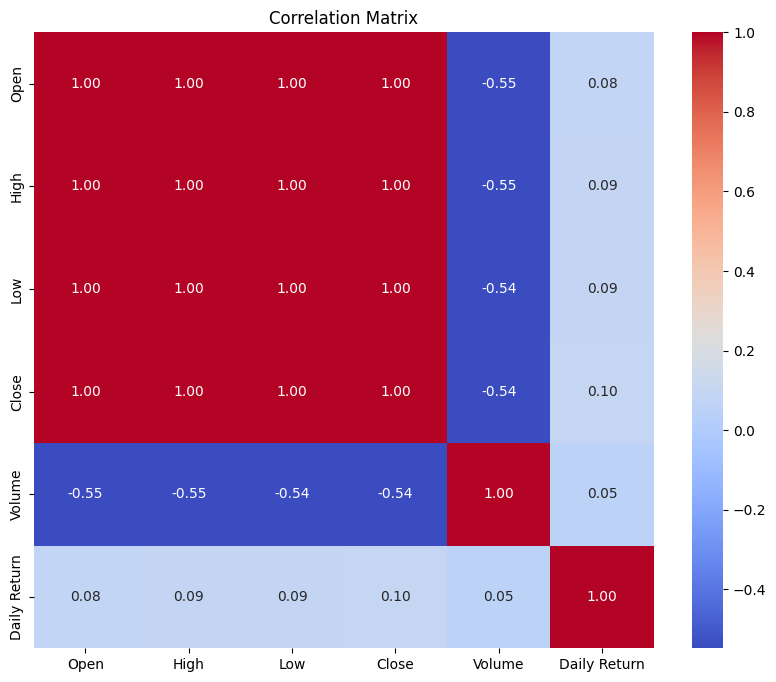

In [ ]:
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()